# Types

Throughout this chapter we've talked about types.  Here we will remind the reader of their significance and importance.

Let us begin by looking at types in Python.  Recall we have the following primitive types:

* integers
* floats
* booleans
* strings

Examples:

In [1]:
print(5)
print(5.8172)
print(True)
print("This is a string")

5
5.8172
True
This is a string


Each of these 'types' of data represent subsets of a set of numbers called the computables.  The computable numbers are those that can be stores or represented in a finite way.  All of them map to an internal binary representation.  As we saw in the last section, here is an algorithm to map from integer to binary:

In [2]:
import math

def integer_to_binary(number):
    biggest_power_of_two = math.log(number, 2)
    if biggest_power_of_two == math.ceil(biggest_power_of_two):
        upper_bound = int(biggest_power_of_two)
    else:
        upper_bound = math.floor(biggest_power_of_two)
    binary_representation = ""
    for i in range(upper_bound, -1, -1):
        power_of_two = math.pow(2, i)
        if power_of_two > number:
            binary_representation += "0"
        else:
            binary_representation += "1"
            number -= power_of_two
    return binary_representation

print(16, integer_to_binary(16))
print(3, integer_to_binary(3))

16 10000
3 11


If we are interested in mapping from boolean to binary, the algorithm is trivial:

True -> 1
False -> 0

Thus we can implement the boolean_to_binary function as:

In [3]:
def boolean_to_binary(boolean: bool) -> str:
    return str(int(boolean))

print("True:", boolean_to_binary(True))
print("False:", boolean_to_binary(False))

True: 1
False: 0


Floating point can be represented as binary using the same algorithm as we did for the integers, just with a '.' representing before and after the decimal point.  Therefore we do the following:

In [5]:
def float_to_binary(number: float) -> str:
    str_repr = str(number)
    left_hand_side, right_hand_side = str_repr.split(".")
    left_hand_side, right_hand_side = int(left_hand_side), int(right_hand_side)
    left_hand_side = integer_to_binary(left_hand_side)
    right_hand_side = integer_to_binary(right_hand_side)
    return ".".join([left_hand_side, right_hand_side])

float_to_binary(5.846)

'101.1101001110'

Note: Because floating point numbers, all numbers are already computable, so we need not worry about infinite real numbers.  Recall that floating point numbers can approximate the irrationals and the transcendental numbers, but cannot represent them with absolute precision.

The final binary representation we need to consider is string to binary.  For this, we simply need to consider, what makes up a string?  It is an array of characters.  And each character comes with a mapping to an integer.  In Python the way we do this is with the `ord` function:

In [6]:
ord("a")

97

From there, we simply map the integer representation of the character to the binary representation.  Thus to map a string to binary we do:

In [7]:
def string_to_binary(string: str) -> str:
    binary = []
    for elem in string:
        binary.append(integer_to_binary(ord(elem)))
    return binary

string_to_binary("Hello World!")

['1001000',
 '1100101',
 '1101100',
 '1101100',
 '1101111',
 '100000',
 '1010111',
 '1101111',
 '1110010',
 '1101100',
 '1100100',
 '100001']

Notice we need to store each character as elements of an array otherwise it will be impossible to recover which part of the binary maps to which character.  

Each of the above functions drives towards a point - all the 'primitive' types in programming actually have a bijection to the binary numbers.  Therefore in a sense, the types we've seen so far implemented in a programming language actually comprise just one type, the computables.  The way the computables are used indicates we are attempting an _approximation_ at a much richer space of types, the mathematical types.  However, since this is only an approximation, it fails in ways that may be unpredictable in real applications.  And we are limited in what we can approximate by the specific hardware and software available to us as scientists.  

Fortunately, the human mind has no such limitation.  We are able to see passed the finite and consider the infinite.  As stated in previous sections, there are problems that machines simply cannot solve, because they can only approximate the infinite.  Here we introduce a rich set of infinite types which will aid us in coming up with algorithms which we will use to approximate results through the computables.  These types will be:

* The natural numbers $\mathbb{N}$

The natural numbers can be thought of as the counting numbers, starting at 0 and heading to infinity one at a time.  So the sequence starts off as:

0, 1, 2, 3, ...

* The integers $\mathbb{Z}$

The integers are the counting numbers, plus their negative equivalents in terms of order of magnitude, heading both to positive and negative infinity one at a time.  So the sequence centered at zero looks like:

..., -3, -2, -1, 0, 1, 2, 3, ....

* The rational numbers $\mathbb{Q}$

The rational numbers are ratios of integers in lowest terms.  So all the integers are a subset of the rationals if you consider the rational equivalent to be an integer over one like:

$$\frac{5}{1}$$

Of course, not all rational numbers are of this form, for instance:

$$\frac{3}{4}$$

Is a perfectly reasonable rational number, but has no integer equivalence.  In this sense, the rationals represent a 'larger' infinity because there are an infinite number of rational numbers between each integer.  

* The irrational numbers $\mathbb{P}$

Just as there are rational numbers that cannot be represented as integers, there are numbers that cannot be expressed as ratios in lowest terms, and yet they are numbers.  An example of this is $\sqrt{2}$.  While clearly a number, and one that comes up _often_.  It is not rational.  We will see a proof of this fact later on in the chapter and prove it's generalization.

* The real numbers $\mathbb{R}$

Finally, we have the real numbers which includes the integers, rationals, irrationals and a set called the transcendental numbers.  Those are numbers that we cannot even approximate with finite representations of numbers.  For instance, $\sqrt{2}$ is irrational, so we cannot write down an 'exact' numeric representation, but we can at least write down $\sqrt{2}$.  But with the transcendentals, like $\pi$ or $e$ we cannot even do that.  There are formulas that approximate both and they do so very, very well.  If you are interested in understanding that approximation deeper, please check out [veritasium video](https://www.youtube.com/watch?v=gMlf1ELvRzc&ab_channel=Veritasium).

There are some other notable sets that we likely won't have time to discuss:

* The complex numbers $\mathbb{C}$

Here is [the wikipedia for the complex numbers](https://en.wikipedia.org/wiki/Complex_number)

* The Quaternion numbers $\mathbb{H}$

And [the wikipedia for the Quaternions](https://en.wikipedia.org/wiki/Quaternion)

For the remainder of this chapter we introduce a set of proofs and proof techniques for dealing with each of these types.  These proofs will not be an exhaustive set of proofs, but give a rough sense of the flavor of proofs in each type.

The reason we can categorize proofs by types is the structural nature of the proofs are based on facts we know about the type in question.  This leads to a standard structure for each proof, based on type, dependent on the property or statement of inquiry.  So for instance, if we want to prove a property of the integers, like that two even integers always produce a third even integer, then we can decompose the proof into the following meta elements:

* type: integers
* generic class: equivalence class closure

This allows us to observe the pattern for how to not only prove the statement, but also _similar_ statements.

## Proofs in the Integers

We begin by showing the above example and then generalize to other similar statements:

Result:

let $\forall$ a, b $\in \mathbb{Z}$ if a,b even then a+b=c such that c $\in \mathbb{Z}$ and c is even.

In order to prove this we'll need a lemma:

Lemma:

$\forall$ a,b $\in \mathbb{Z}$, a+b=c such that c $\in \mathbb{Z}$.

Proof:

We will prove the above result with a proof by contradiction.  Thus we begin by assuming a+b=c and c $\notin \mathbb{Z}$.

If this is the case then, a + b = c $\iff$ b = c - a.  But since c $\notin \mathbb{Z}$ this must mean b $\notin \mathbb{Z}$, which is a contradiction.  Therefore c $\in \mathbb{Z}$.

Q.E.D.

Proof:

Recall the definition of an even integer x, x = 2k, for k $\in \mathbb{Z}$.

Thus we can directly apply the definition:

a = 2j for j $\in \mathbb{Z}$.
b = 2i for i $\in \mathbb{Z}$.

And a + b = 2j + 2i = 2(j + i).

Since j, i $\in \mathbb{Z}$, j + i $\in \mathbb{Z}$ by lemma and we can call the summation, j+i=k.  Thus,

a + b = 2j + 2i = 2k such that $\in \mathbb{Z}$ and the summation is even by definition of an even integer.

Q.E.D.

Let's look at another similar result, 

Result:

let $\forall$ a, b $\in \mathbb{Z}$ if a,b odd then a+b=c such that c $\in \mathbb{Z}$ and c is even.

Proof:

Recall the definition of an odd integer x, x = 2k + 1, for k $\in \mathbb{Z}$.

Thus we can directly apply the definition:

a = 2j + 1 for j $\in \mathbb{Z}$.
b = 2i + 1 for i $\in \mathbb{Z}$.

And a + b = 2j + 1 + 2i + 1 = 2(j + i + 1).

Since j, i $\in \mathbb{Z}$, j + i $\in \mathbb{Z}$ by lemma and we can call the summation, j+i+1=k.  Thus,

a + b = 2j + 2i + 2= 2k such that $\in \mathbb{Z}$ and the summation is even by definition of an even integer.

Q.E.D.

Notice - that the proof and structure were essentially identical.  Any proof involving parity, or the generalization equivalence classes, will look very similar.  Thus we have identified the necessary _structure_ of the result to prove a large set of results.  In theory this set of results is _infinite_, since now we can answer questions about any multiplicative factor of an even or odd number plus any multiplicative factor of an even or odd number.  To be clear, the 'class' of results is very limited.  But within that class we can verify any statement.  

It is left to the reader to verify some other statements within this generic class of results regarding even and odd numbers.

Now that we've informally mentioned equivalence classes.  Let's discuss them formally.

### Towards Equivalence Classes

Recall from Introduction_To_Proofs the term relation - 

A relation is a set R from A to B, such that $R:A \rightarrow B$.  Recall that relations are mappings from A to B, but don't require much else.  There are some extra properties that relations can have:

* reflexive:

let x $\in$ A, then for $R: A \rightarrow A$, x R x $\forall x \in A$

* symmetric:

let x,y $\in$ A, for $R: A \rightarrow A$, if x R y then y R x,  $\forall x,y \in A$

* transitive:

let x,y,z $\in$ A, for $R: A \rightarrow A$, if x R y and y R z, then x R z $\forall x,y,z \in A$

Definition:

An **equivalence relation** is a relation that is reflexive, symmetric and transitive.

### Equivalence Classes

We are now ready to begin discussing equivalence with respect to relations.

Definition:

For an equivalence relation R defined on a set A for a $\in$ A, the set

$$[a] = \{x \in A: x R a\}$$

then $[a]$ is an **equivalence class**.

Thus, we can represent a subset of a set by it's equivalence under some equivalence relation.

In order to provide examples of equivalence classes, we'll need to define integer division:

a | b (read a divides b) if and only if b = ac.

We can define integer division in Python fairly easily:

In [16]:
def int_divide(a, b):
    count = 0
    original_b = b
    while b > 1:
        b -= a
        count += 1
    assert b == 0, Exception(f"{a} does not evenly divide {original_b}")
    return count

int_divide(3, 6)

2

Notice - we only consider integer solutions in this case.  So if we did:

In [17]:
int_divide(3, 7)

AssertionError: 3 does not evenly divide 7

Which would be the 'wrong' answer for the real numbers, but is correct because we limit ourselves to integer solutions only.  Specifically, there is no c, such that b = ac when b = 7 and a = 3.

Next let's look at a related construct to division, modulo.  We'll use modulo to construct a naive notion of equivalence.

Definition:

For integers a,b with n $\ge$ 2, we say that a is equivalent to b modulo n, written $a = b (mod n)$ if $n | (a - b)$.

So for instance, 

8 = 4 (mod 2) because

$2 | (8 - 4)$, namely, 

$8 - 4 = 4$ and $2 | 4$ because $2*2 = 4$.

In Python it is easy to check if two numbers are equivalent modulo some other number:

In [18]:
def int_equivalence(a, b, n):
    return a % n == b % n

int_equivalence(8, 4, 2)

True

In Python things work a little differently, the modulo operator in Python `%` takes the remainder from the standard division algorithm:

$$b = aq + r$$

where a is the number being divided, q is the quotient and r is the remainder.

We can actually show that the two formulations are equivalent:

Result:

$$a = b \text{ }(mod\text{ } n) \iff a \text{ }(mod\text{ } n) = b \text{ }(mod\text{ } n)$$

Proof:

($\rightarrow$)

First assume,

$$a = b \text{ }(mod\text{ } n)$$ 

Since $n | (a - b)$, $\exists k \in \mathbb{Z}$ such that $a - b = nk$.

Let a mod n = r.

Then, by the division algorithm, $\exists q \in \mathbb{Z}$ such that a = nq + r.

Using $a = nq + r$ to replace a in $a - b = nk$, we get:

$$nq + r - b = nk \iff nq - nk + r = b \iff n(q -k) +r = b$$

This shows that r is the remainder when n| b  so,

$$b\text{ } (mod\text{ } n) = r$$ and,

$$a\text{ } (mod\text{ } n) = r$$

($\leftarrow$)

Let 

$$r = a\text{ } (mod\text{ } n) = b\text{ } (mod\text{ } n)$$

Then 

$$a = nq_{1} + r$$
$$b = nq_{2} + r$$

then,

$$a - b = nq_{1} + r - (nq_{2} + r) \iff n(q_{1} - q_{2})$$

Thus,

$m | (a - b)$ so $a = b\text{ } (mod\text{ } n)$.

Q.E.D.


We are now ready for our first example equivalence class, even numbers.

Example:

For $\mathbb{Z}$ $[2]$ is an equivalence class under integer division.

Proof:

$\forall$ a, b $\in \mathbb{Z}$ such that a, b even, they belong to the same equivalence class.

We begin by noting that:

a = 2k such that k $\in \mathbb{Z}$.

b = 2j such that j $\in \mathbb{Z}$.

Therefore, 

$$ m = k - j $$.

$$ 2m = 2(k - j) $$

$$ 2 | 2(k - j) $$

$$ 2| (a - b) $$

By m an integer, 2 | (a - b).

Thus a = b (mod 2), and further more, a (mod 2) = b (mod 2).

Thus all even numbers are in the same equivalence class and $x \text{ }(mod\text{ } 2)$ is the equivalence relation.

We'll now prove $x \text{ }(mod\text{ } 2)$ is an equivalence relation:

Reflexive:

$$x R x \rightarrow x (mod 2) = x (mod 2) \iff x = x\text{ } (mod\text{ } 2 \iff 2 | (x - x) \iff 2 | 0$$

$$ 2 | 0 \iff 0 = 2*0$$

The final statement should be obvious, this R is reflexive.

Symmetric:

if x R y, then y R x.

Statement to Prove:

$$x = y \text{ }(mod\text{ } 2) \rightarrow y = x\text{ } (mod\text{ } 2)$$

$$x = y\text{ } (mod\text{ }2) \iff 2 | (x - y) \iff x = 2m + y$$

Now we have some cases:

$x = y$:

If x = y, then we are actually back in case one and therefore we are done.

$x \ne y$:

this means that if m > 0 for x = 2m + y, then y = 2(-m) + x.  However this is not a problem since we are dealing with _equivalence_, not equality.  Specifically,

$$a\text{ } (mod\text{ } n) = -a\text{ } (mod\text{ } n) $$.

Another way to see this is, if n| a, then n | -a.

Lemma:

If n | a, then n | -a.

$$n | a \rightarrow a = nq \rightarrow -a = n(-q) \rightarrow n|-a$$.

Getting back to our proof we have:

$$y = 2(-m) + x \iff y - x = 2(-m) \iff 2 | (y - x) \iff y = x\text{ } (mod\text{ } 2)$$

Q.E.D.

Finally, we need only prove the transitive property:

If x R y, and y R z then x R z.

Given that:

$$ x R y \rightarrow x = y\text{ } (mod\text{ } 2)$$
$$ y R z \rightarrow y = z\text{ } (mod\text{ } 2)$$

$$\rightarrow$$

$$ 2 | (x - y), 2 | (y - z) $$

$$\rightarrow$$

$$x - y = 2q$$

$$y - z = 2p \rightarrow y = 2p - z$$

Now we substitute in equation 2 into equation 1:

$$ x - (2p -z) = 2q$$

$$\rightarrow$$

$$ x + z = 2(q + p)$$

$$\rightarrow$$

$$ 2 | (x + z) $$

$$ x = z \text{ }(mod\text{ } 2)$$

Q.E.D.

We leave it to the reader to prove the following generalization:

The following is an equivalence relation:

$$y = x\text{ } (mod\text{ } p)$$

Where x, y $\in \mathbb{Z}$ and p is a prime.

Note, the proofs are essentially exactly the same as the above.

## Proofs in the Rationals

Now that we've explored the integers let's move onto the rational numbers.  As stated previously, a rational number is of the form:

$$\frac{a}{b}$$ 

such that a, b $\in \mathbb{Z}$.

Let's start off this section with a reasonably straight forward set of proofs:

* addition is closed in $\mathbb{Q}$
* multiplication is closed in $\mathbb{Q}$
* the distributive property holds in $\mathbb{Q}$.

1) Addition is closed in $\mathbb{Q}$:

Proof:

Assume we have q and r such that $q = \frac{a}{b}$, $r = \frac{c}{d}$ such that a,b,c,d $\in \mathbb{Z}$.  Now we simply 'apply' the definition of addition:

$$q + r = \frac{a}{b} + \frac{c}{d} = \frac{a+c}{b+d}$$

by a,b,c,d $\in \mathbb{Z}$, a+c and b+d $\in \mathbb{Z}$.

Therefore $\mathbb{Q}$ closed under addition.

Q.E.D.

2) Multiplication is closed in $\mathbb{Q}$.

This proof goes very much the same way.

Proof:

Assume we have q and r such that $q = \frac{a}{b}$, $r = \frac{c}{d}$ such that a,b,c,d $\in \mathbb{Z}$.  Now we simply 'apply' the definition of multiplication:

$$q + r = \frac{a}{b} * \frac{c}{d} = \frac{a*c}{b*d}$$

by a,b,c,d $\in \mathbb{Z}$, $a*c$ and $b*d$ $\in \mathbb{Z}$.

Therefore $\mathbb{Q}$ closed under multiplication.

3) The distributive property holds in $\mathbb{Q}$.

This proof goes slightly differently.  But it is more or less the same.

Proof:

Assume we have p, q and r such that $q = \frac{a}{b}$, $r = \frac{c}{d}$, and $p = \frac{e}{f}$ such that a,b,c,d,e,f $\in \mathbb{Z}$.  Now we simply 'apply' the definitions of multiplication and addition:

$$p(q + r) = \frac{e}{f}(\frac{a}{b} + \frac{c}{d}) = \frac{e}{f}(\frac{a+c}{b+d}) = \frac{ae + ce}{bf+df}$$

by a,b,c,d,e,f $\in \mathbb{Z}$, $ae + ce$ and $bf+df$ $\in \mathbb{Z}$.

Therefore the distributive property holds in $\mathbb{Q}$.

## Proofs in the Irrationals

As you can see, there isn't a lot of 'new' stuff in the basic properties of the rationals.  However, there are certainly interesting proofs here.  One of the classic proofs involves the irrationality of the $\sqrt{2}$.  This proof poses a major digression from the proofs we've seen before.  If you are reading this book, you've liked used the consequences of this theorem for a very long time, for instance, if you've ever taken calculus.  But it is worth to take a moment and realize that the irrationality of $\sqrt{2}$ was once _hottly debated_.  This is because this irrational number comes up _naturally_ in a lot of the mathematics that has been known since the days of Pythagoras.  Consider the Pythagorian formula for distance:

First recall the general distance formula:

$$ c = \sqrt{a^{2} + b^{2}} $$

Now set a = b = 1:

$$ \sqrt{1^{2} + 1^{2}} = \sqrt{2}$$

There were many who insisted that $\sqrt{2}$ must be measurable in a precise way, and that this quantity was therefore rational.  And yet, an exact mathematical number alluded scholars until this proof was discovered.  The acceptance of the irrational numbers was a breakthrough in mathematics.  Without the irrationals, we would not have had the calculus in it's current form.  And that may have meant countless scientific and engineering discoveries never occur.  This proof is a forebarer for much of the innovation over the course of human history.  

Without further ado, the irrationality of the square root of 2:

Theorem: The square root of two is irrational.

Proof:

We begin by assuming to the contrary that $\sqrt{2}$ is rational.  Thus we can express it as $\sqrt{2} = \frac{m}{n}$ such that m, n $\in \mathbb{Z}$ and m,n are in lowest terms.

We can now observe:

$$\sqrt{2} = \frac{m}{n} \iff \sqrt{2}^{2} = (\frac{m}{n})^{2}$$

Thus,

$$ 2 = \frac{m^{2}}{n^{2}} $$

Thus, 

$$ 2*n^{2} = m^{2} $$

Therefore $m^{2}$ is even.

Lemma:

if $a^{2}$ even then a is even.

Proof:

We prove the contrapositive:

If a is odd, then $a^{2}$ is odd:

a = 2k + 1, k $\in \mathbb{Z}$.

$$ a^{2} = (2k+1)(2k+1) = 4k^{2} + 4k + 1 = 2(2k^{2} + 2k) + 1 $$

by k $\in \mathbb{Z}$, 2(2k^{2} + 2k) + 1 is odd.  

Q.E.D.

Returning to our proof, by the above lemma we have m even by $m^{2}$ even.

Thus m = 2q.

Therefore we have,

$$(2q)^{2} = 2n^{2}$$

Thus,

$$ 4q^{2} = 2n^{2}$$

Thus,

$$n^{2} = 2q^{2}$$

Thus $n^{2}$ is even and by the above lemma, therefore n is even.  This implies that both,

m and n are even.  Therefore,

$$ \frac{m}{n} = {2q}{2p} $$.

However this is a contradiction because we assumed that $\frac{m}{n}$ were a fraction in _lowest terms_.  That is, they have no common factors.  Therefore we always can find a term to divide out, forever.  There is no possible lowest terms ratio.  And since we cannot express the number $\sqrt{2}$ as a ratio of two integers, it is not rational.

Q.E.D.

It turns out that any number for the form $\sqrt{p}$ where p is prime will be irrational.  Therefore there are _infinitely_ many irrational numbers.  You may be tempted at this point to think that there are fewer irrational numbers than rational ones.  But the reverse happens to be true.  There is an _initially_ sparser set of irrationals, however, we can also do the following:

$$ ab + c$$

Where a, c $\in \mathbb{Q}$ and b $\in \mathbb{P}$.  Thus we can take _combinations_ of rational numbers together with an irrational number.  Of course, the above construction is just the simplest one.  We can have _n_ many terms that are irrational.  Thus the _size_ of the irrational numbers is much larger than the size of the rationals.  In fact, there is a _countable_ infinity of rational numbers but an _uncountable_ infinity of irrational numbers.

In general, countability is general benchmark of cardinality within infinite sets.  If a set is infinite but countable then there is a bijection to the natural numbers.  However, if the cardinality is uncountable no such bijection exists.  The irrationals is the first set we are discussing for which this is the case.  To some extent this is a watershed moment.  Here we leave the familiar primitive notions of counting that have guided mankind in it's infancy.  Now we tread on new ground, in a land beyond the comfortable, where intuition can and will often fail.  In this new land, mathematical objects will need to be treated with care and assumptions will have to be checked and studied carefully.  Here there be dragons.

## Proofs in the Reals

Now that we've gone through the irrationals, next we are ready to talk about the real numbers.  Alas, we cannot yet engage in a discussion regarding how to come up with formulas for transcendental numbers, so we'll have to take them as a given in the set of reals, $\mathbb{R}$.


We shall begin by looking at some straight forward proofs involving the reals, to get a flavor for how to prove things when real numbers are involved.

Result:

if x and y are real numbers such that xy = 0, then x = 0 or y = 0.

Proof:

Assume that xy = 0.  We consider two cases:

* x = 0
* x $\ne$ 0

Case 1. x = 0.  Then we have the desired result.

Case 2. x $\ne$ 0.  Multiplying xy = 0 by $\frac{1}{x}$, we obtain,

$$\frac{1}{x}(xy) = 0 \frac{1}{x}$$

Thus,

$$y = 0$$

Q.E.D.

Result:

Let $\in \mathbb{R}$.  If $x^{3} - 5x^{2} + 3x = 15$, then x = 5.

Proof.

This is a straight forward plug and chug proof:


$$x^{3} - 5x^{2} + 3x - 15 = 0$$

therefore,

$$x^{2}(x - 5) + 3(x - 5) = 0$$

thus,

$$(x^{2} + 3)(x - 5) = 0$$

$$x = \sqrt{-3}$$

And 

$$x = 5$$

Are solutions.

Q.E.D.

Result

For every two real numbers x and y,

$$| x + y | \le |x| + |y|$$

Proof:

We will prove this by cases.  If x or y is zero then we are done, so we can safely assume they are non-zero.

Case 1. x > 0 and y > 0.  Then x + y > 0 and

$$ |x + y| = x + y = |x| + |y| $$

Case 2. x < 0 and y < 0.  Then x + y < 0 and

$$ |x + y| = -(x + y) = -x + -y = |x| + |y|$$

Case 3. x > 0 and y < 0.  There are technically two cases here, but without loss of generality, we only consider the one.

Sub-case 3.1:

$$ x + y \ge 0$$

$$ |x| + |y| = x - y > x + y = |x + y| $$

Sub-case 3.2:

$$ x + y \le 0 $$

$$ |x| + |y| = x - y > -x - y = -(x + y) = |x + y|$$

Thus for all cases, the inequality holds.

Q.E.D.

Now that we've considered some warmup proofs, time for some 'important' proofs.

Result:

There is no smallest positive real number.

Proof:

Assume, to the contrary, that there is a smallest positive real number, x.  Since,

$$ 0 < \frac{x}{2} < x $$

It follows that $\frac{x}{2}$ is a positive real number that is smaller than x.  This however is a contradiction.

In fact, our choice of 2 was not special.  _Any_ real number could be used to create a 'smaller' real number then our 'so called smallest'.

Q.E.D.


## Exponentials and Logarithms

We will now consider a set of operators that are best studied in the reals and other similar infinite sets.  The first of these two operators is exponentials.

We begin with a simple definition:

We can view the operation of exponentiation first through the lens of repeated division.  Let's look at an implementation in Python:

In [1]:
def exponentiation(a, b):
    result = 1
    for _ in range(b):
        result *= a
    return result

exponentiation(2, 3)

8

In mathematical notation, the above would appear as:

$$ b^{a} $$

Here $b$ would be referred to as the base, whereas $a$ would be the power.

Here are some additional rules regarding exponents:

* $b^{0} = 1$
* $b^{1} = b$
* $b^{-1} = \frac{1}{b}$
* $(b^{a})^{n} = b^{an}$
* $(b^{a})^{n} = (b^{n})^{a}$
* $b^{m}b^{n} = b^{m+n}$
* $(bc)^{n} = b^{n}c^{n}$
* $\frac{b^{a}}{b^{c}} = b^{a-c}$
* $\frac{b^{a}}{c^{a}} = (\frac{b}{c})^{a}$

Unfortunately we lack the mathematical proof technique to prove any of the above rules.  However, we will remedy that soon.

Moving on, another important operator, one we will use _incredibly_ often in the analysis of algorithms is the logarithm.  The reason we will be analyzing the logarithm is because as a function, it has desirable properties that we will want in our algorithms.  Specifically, logarithms exhibit _asymptotic_ behavior, that is, eventually _they stop growing_.  Thus we can observe that there is an upper bound how to long it will take a certain algorithm to run, up to a constant factor based partially on hardware constraints, _regardless of input size_.  

That means we can guarantee that once N is sufficiently large, for any algorithm that is logarithmic, it will _always_ take approximately that long.  This is of course subject to the input not overwhelming the memory of the machine.  

Now let's look at the picture of the standard logarithm and exponential functions.

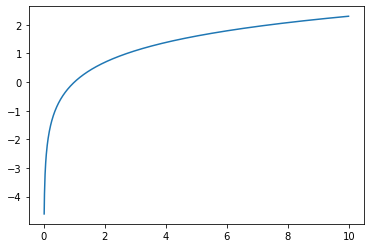

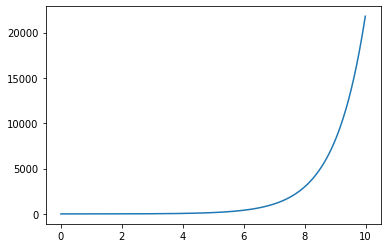

In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np

domain = np.arange(0.01, 10, 0.01)
logs = [math.log(x) for x in np.arange(0.01, 10, 0.01)]
exps = [math.exp(x) for x in np.arange(0.01, 10, 0.01)]

plt.plot(domain, logs)
plt.show()
plt.plot(domain, exps)
plt.show()

As you can see the log and exponential exhibit the opposite behavior as their input size grows.  In fact, they form a bijection.  That is:

$$ log(e^{x}) = x $$

Given this we can thing of a logarithm sort of as repeated division:

In [22]:
def exponentiation(a, b):
    product = 1
    for _ in range(b):
        product *= a
    return product

def logarithm(base, result):
    counter = 0
    while result > 1:
        result /= base
        counter += 1
    return counter

powers_of_2 = {}
for i in range(30):
    powers_of_2[i] = exponentiation(2, i)

for i in range(1,30):
    if logarithm(2, powers_of_2[i]) != i:
        print("failed")
        break

The other rules for logarithms include:

* $a = b^{log_{b}a}$
* $log_{c}(ab) = log_{c}a + log_{c}b$
* $log_{b}a^{n} = n log_{b}a$
* $log_{b}a = \frac{log_{c}a}{log_{c}b}$
* $log_{b}(\frac{1}{a}) = -log_{b}a$
* $log_{b}a = \frac{1}{log_{a}b}$
* $a^{log_{b}c} = c^{log_{b}a}$


## Proof by induction

Now that we have introduced all the necessary rules for exponentiation and the logarithm, it's time to learn how to prove results related to those two functions.  For this and many of the proofs we'll see regarding algorithms we'll need a proof technique called induction.

Induction works because of a property called well ordering.  

Definition:

If a set is well ordered then every nonempty subset has a least element.

Examples of subsets of the real numbers that are well ordered include:

* $\mathbb{N}$ - the natural numbers
* any closed interval of the real numbers
* any clopen interval of the real numbers where the lower bound is closed.

Aside:

A clopen set is one that is half open, half closed.

Counter examples of well ordered sets include:

* any open interval of the real numbers
* $\mathbb{Z}$ - the integers
* $\mathbb{Q}$ - the rationals
* $\mathbb{P}$ - the irrationals

We now introduces some proofs which will help us contextualize the notion of well ordering, which we will need for induction.

Theorem:

If a set A of real numbers has a least element, then A has a unique least element.

Proof:

Let $m_{1}$ and $m_{2}$ be least elements of A.  Since $m_{1}$ is a least element, $m_{2} \ge m_{1}$; while since $m_{2}$ is a least element, $m_{1} \ge m_{2}$.  Therefore, $m_{1} = m_{2}$.

Q.E.D.

Next we need to introduce a new set, $\mathbb{N}_{m}$:

For $m \in \mathbb{Z}$, we define the set $\mathbb{N}_{m}$ by

$$\mathbb{N}_{m} = \{ x \in \mathbb{Z}: x \ge m \} = \{m, m+1, m+2, .. \}$$

Theorem:

For every integer m, the set $\mathbb{N}_{m}$ is well-ordered.

Proof:

We need only show that every nonempty subset of $\mathbb{N}_{m}$ has a least element.  So let S be a nonempty subset of $\mathbb{N}_{m}$.  If S is a subset of $\mathbb{N}$, then, by the well ordering principal, S has a least element.  Hence we may assume that S is not a subset of $\mathbb{N}$.  Thus S - $\mathbb{N}$ is a finite nonempty set and so contains a least element t.  Since $t \le 0$, it follows that $t \le x$ for all $x \in S$; so t is a least element of S.

The fact that $\mathbb{N}_{m}$ is well ordered will be of paramount importance as we will see in the next proof:

Theorem - Mathematical induction

Let $m \in \mathbb{Z}$, and let S be a subset of $\mathbb{N}_{m}$ such that

* $m \in S$; and
* whenever $k \in S$, then $k + 1 \in S$.

Then S = $\mathbb{N}_{m}$.

Proof:

Assume, to the contrary, that 

$$S \ne \mathbb{N}_{m}$$.  

Then,

$$S \subset \mathbb{N}_{m}$$

Define,

$$ T = \mathbb{N}_{m} - S$$

Therefore, 

$$T \ne \emptyset$$

Hence, $\mathbb{N}_{m}$ is partitioned into S and T.  Since T is a nonempty subset of $\mathbb{N}_{m}$, and $\mathbb{N}_{m}$ is well ordered, T has a least element $t$.  

Since $x \ge m$ for every $x \in \mathbb{N}_{m}$ and $m \in S$, it follows that $t > m$;

so $t \ge m + 1$

Thus,

$$ t - 1 \ge m$$ 

And by definition of $\mathbb{N}_{m}$, 

$$ t - 1 \in \mathbb{N}_{m}$$

Since t is the smallest element of T, 

$$ t - 1 \in S $$

However by the second property,

$$(t - 1) + 1 = t \in S$$.

But,

$$ t \in T$$

Which is a contradiction!

Q.E.D.

Thus, we cannot partition $\mathbb{N}_{m}$ into two subsets, therefore if there exists some base case (the first property) and if whenever k is in the set, then k+1 is in the set, then the _whole_ set 'greater than' that base case will be in the same set.  

This property would not be possible without the well ordering principal - which states there is a smallest element for the subset.  Recall that sets, relations and functions can all be thought of the same way.  This notion of a smallest element means there is a smallest element for which rules can be true.  Which is at the heart of proof by induction.

The other major component is the notion of increase - by showing that a given kth element and the k+1st element are both in the set, then all the larger elements are also.  This property is surprising and often hard to digest for those new to the subject.

The above proof does illustrate why - we cannot construct a set that bounds S above, assuming properties one and two hold.  The inability to bound S above is _why_ induction works.

## Using Proof By Induction

Now that we have shown proof by induction works, let's use it to prove some stuff!

Result:

$$ 1 + 2 + 3 + .... + n = \frac{n(n+1)}{2}$$

We can write this equivalently as,

$$ \sum_{i=1}^{n}i = \frac{n(n+1)}{2}$$

Proof:

base case:

$$ 1 = \frac{1(1+1)}{2} = 1$$

Thus we have shown the base case.

Now we assume the kth case:

$$ \sum_{i=1}^{k}i = \frac{k(k+1)}{2}$$

And then we prove the k+1 case, using the kth case:

$$ \sum_{i=1}^{k+1}i = \sum_{i=1}^{k}i + k+1 = \frac{k(k+1)}{2} + (k + 1) = \frac{k(k+1)}{2} + \frac{2(k + 1)}{2}$$

$$\rightarrow$$

$$ \frac{k(k+1) + 2(k + 1)}{2} = \frac{k^{2} + 3k + 2}{2} = \frac{(k + 1)(k + 2)}{2}$$

Thus by the inductive hypothesis,

$$ 1 + 2 + 3 + .... + n = \frac{n(n+1)}{2}$$

Q.E.D.

Next let's look at a similar but sufficiently different result:

$$ \sum_{i=2}^{n}(i-1) = \frac{n(n-1)}{2}$$

base case:

i=2

$$2-1 + 1-1 = \frac{2(1)}{2} \rightarrow 1 = 1$$

Now we assume the kth case:

$$ \sum_{i=2}^{n}(i-1) = \frac{n(n-1)}{2}$$